In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [ ]:
df = pd.read_excel("/content/datatab (1).xlsx")
df.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [ ]:
df.isnull().sum()

,0
Disease,0
Age,0
Gender,0
Smoker status,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Disease        36 non-null     object
 1   Age            36 non-null     int64 
 2   Gender         36 non-null     object
 3   Smoker status  36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
df["Disease"] = df["Disease"].map({"diseased": 1, "not diseased":0})
df["Smoker status"] = df["Smoker status"].map({"Smoker":1, "Non-smoker":0})

In [ ]:
x=df[['Age','Smoker status']]
y = df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(28, 2)

(28,)

(8, 2)

(8,)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', conf_mat)
acc_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy : ', acc_score)
print('Acc in % : ', int(acc_score*100),'%')

Confusion Matrix : 
 [[3 1]
 [1 3]]
Accuracy :  0.75
Acc in % :  75 %


<Axes: xlabel='Predicted', ylabel='Actual'>

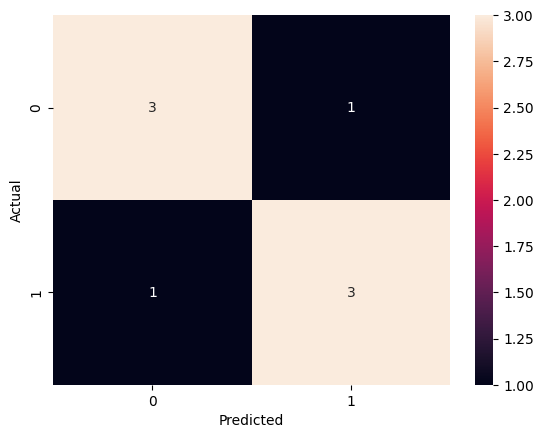

In [ ]:
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)